# Project Name:- Loan Application Status Prediction

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("E:\Loan Prediction\loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print('Number Of Rows:',df.shape[0])
print('Number Of Columns:',df.shape[1])

Number Of Rows: 614
Number Of Columns: 13


In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis

# Checking Nulls

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

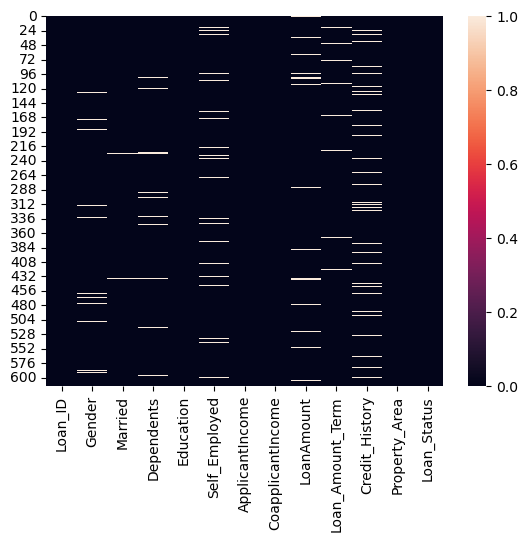

In [9]:
sns.heatmap(df.isnull())
df.isnull().sum()

In [11]:
df.duplicated().sum()

0

# Removing Null Values

In [12]:
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)

In [13]:
# filling zeros in Dependant columns
df['Dependents']=df['Dependents'].fillna(0)

In [14]:
# filling loan amount column with the mean value of column
df['LoanAmount'].fillna(value=df['LoanAmount'].mean(),inplace=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

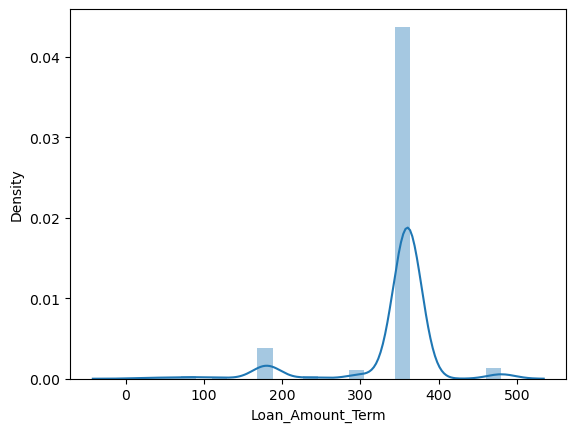

In [15]:
sns.distplot(df['Loan_Amount_Term'])

In [18]:
# filling 'Loan_AMount_Term' column with the mode of the column
df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].mode()[0],inplace=True)

# Dropping Irrelevant Columns

<Axes: xlabel='Credit_History', ylabel='Density'>

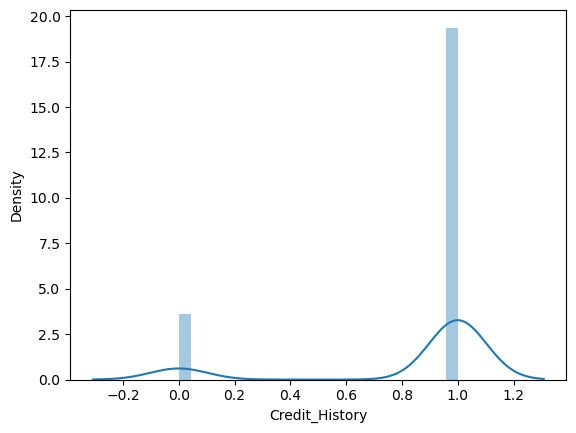

In [19]:
sns.distplot(df['Credit_History'])

In [20]:
# credit_history contain single value in all row. so this is not more useful
df.drop(columns=['Credit_History'], axis=1, inplace= True)

In [21]:
# Dropping unique Loan_Id that is also not more useful for analysis
df.drop(columns=['Loan_ID'],axis=1, inplace= True)

In [22]:
df.shape

(614, 11)

# Univariate Analysis

In [23]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

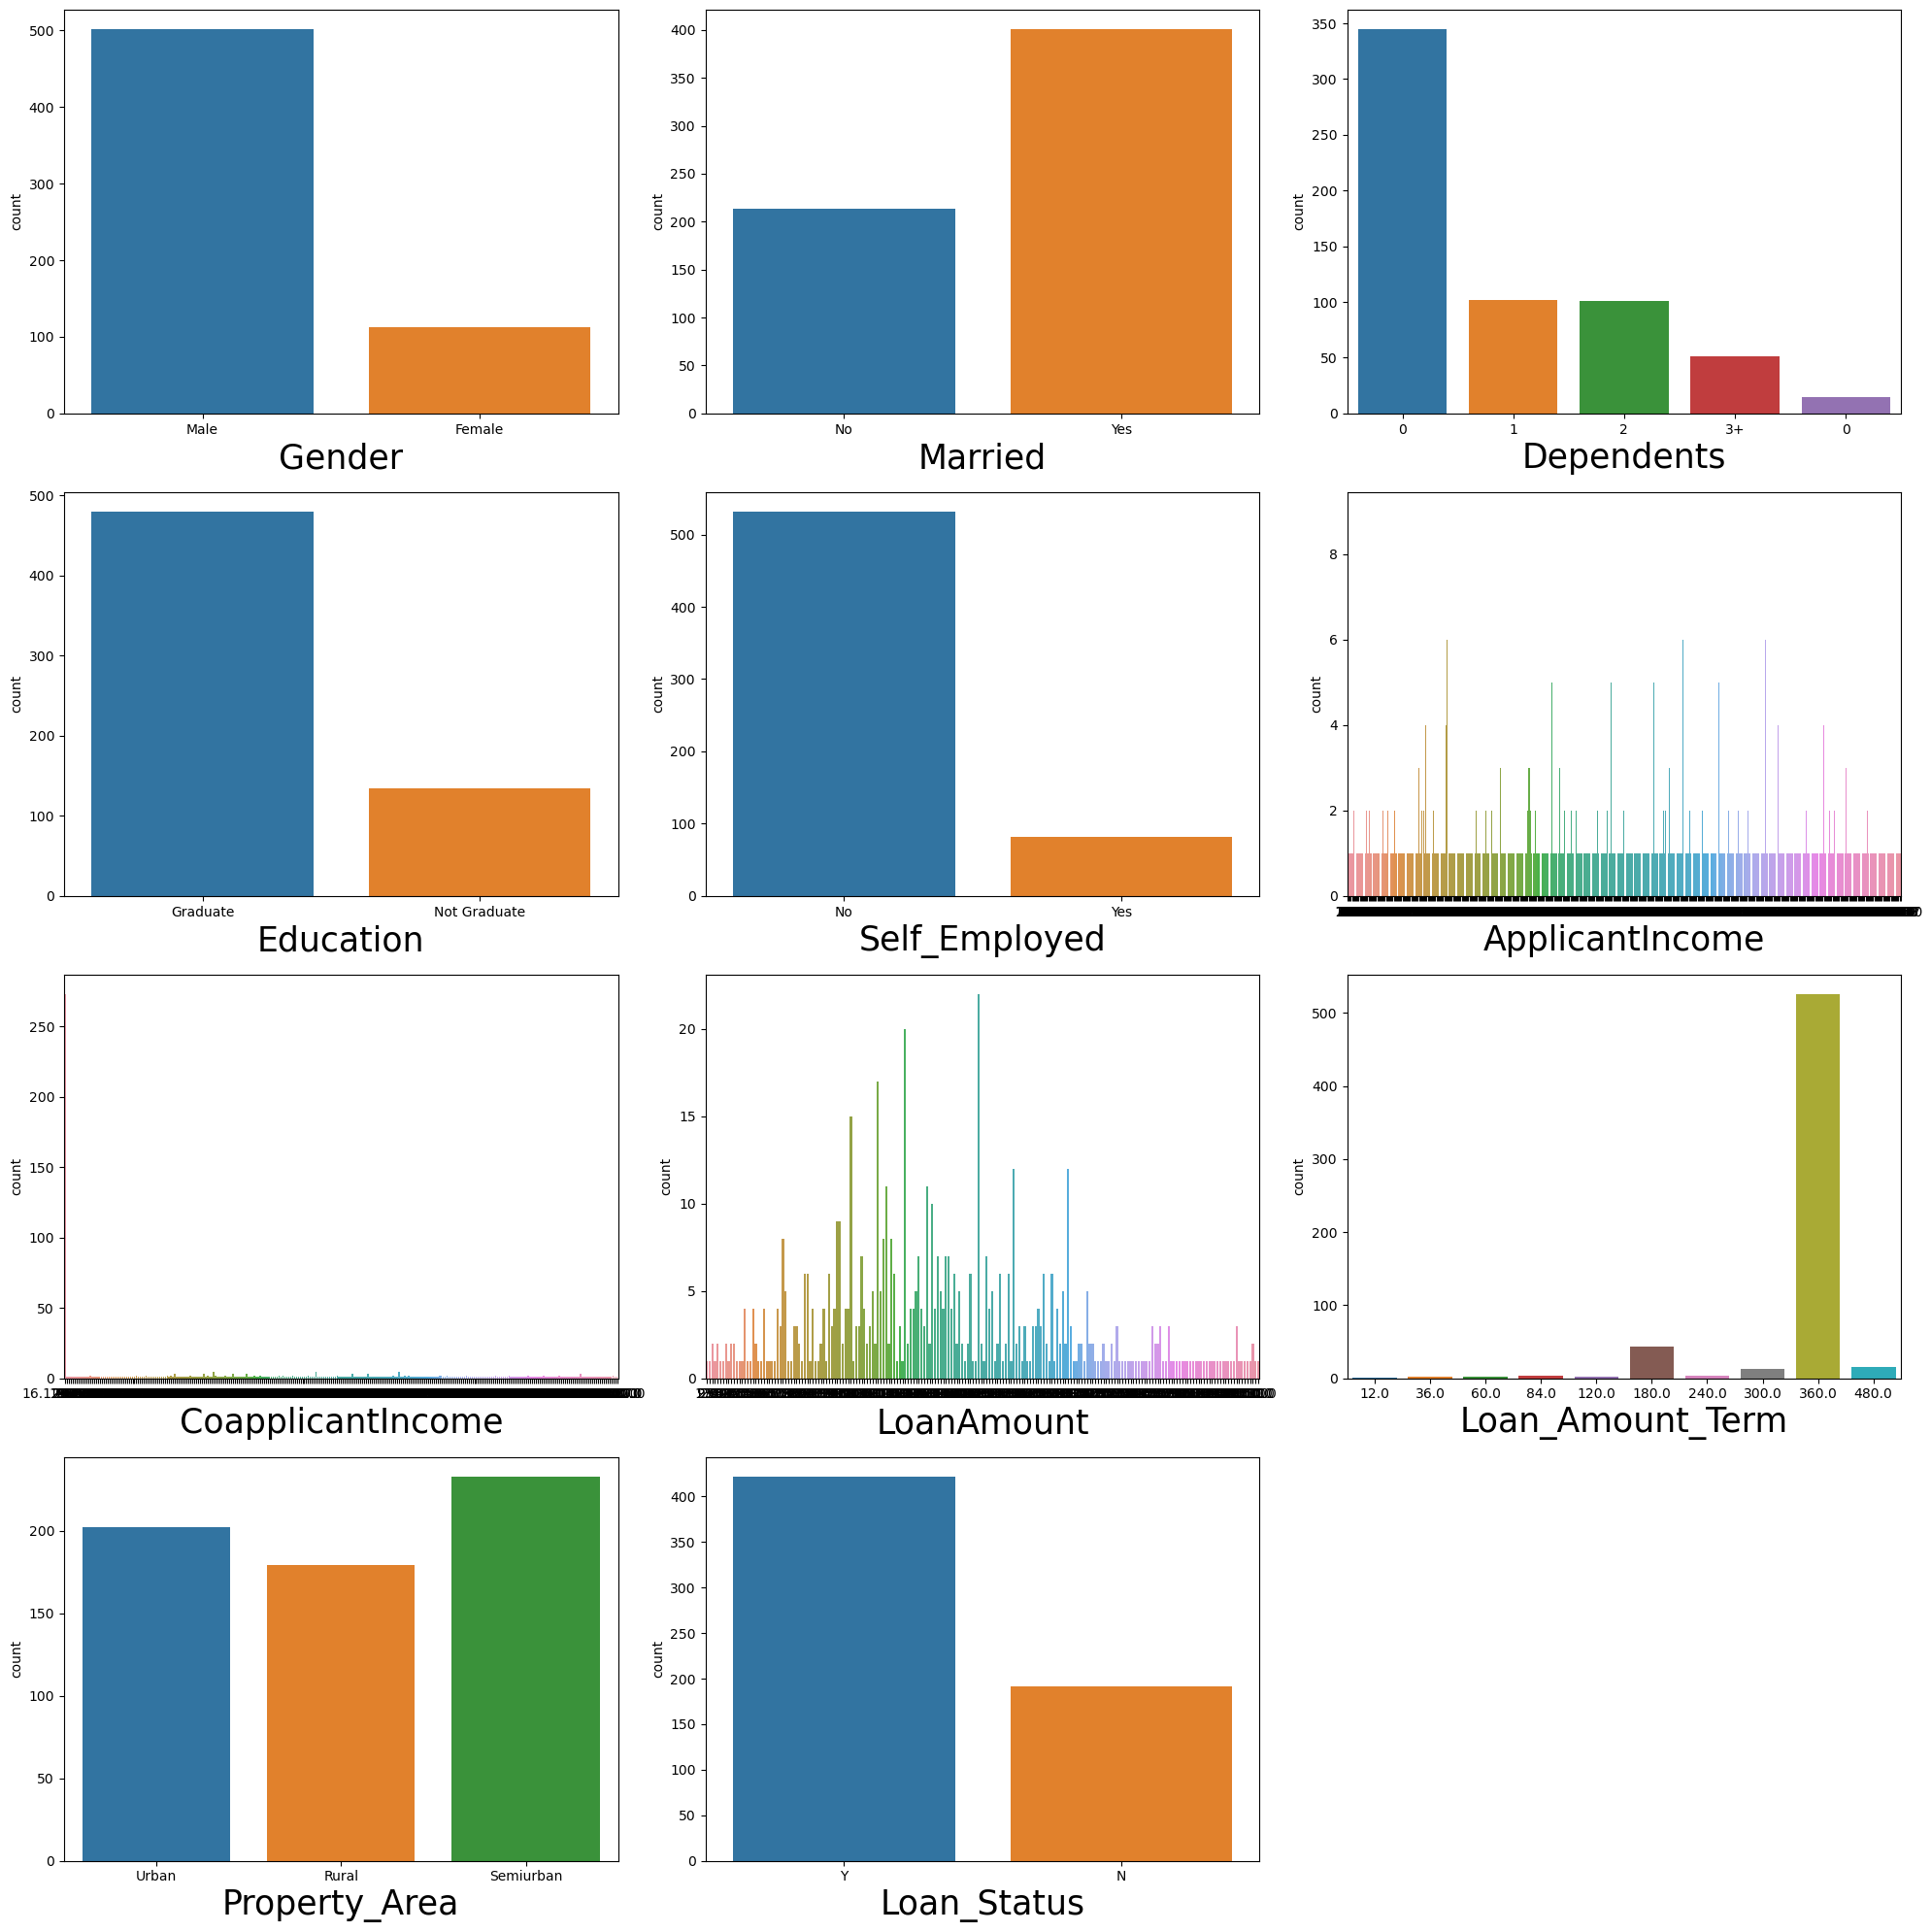

In [25]:
plt.figure(figsize=(20,20))
categories=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status']
for i, category in enumerate(categories, 1):
    plt.subplot(4,3,i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)
    
plt.tight_layout()
plt.show()

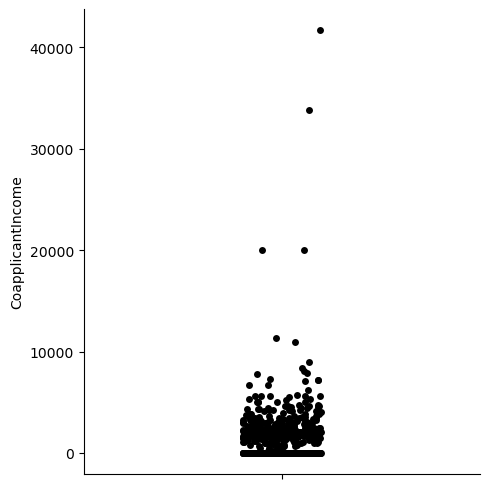

In [29]:
sns.catplot(df['CoapplicantIncome'],color='k')

Comment- In CoapplicantIncome column maximum value lies arround zero

# Bivariate Analysis

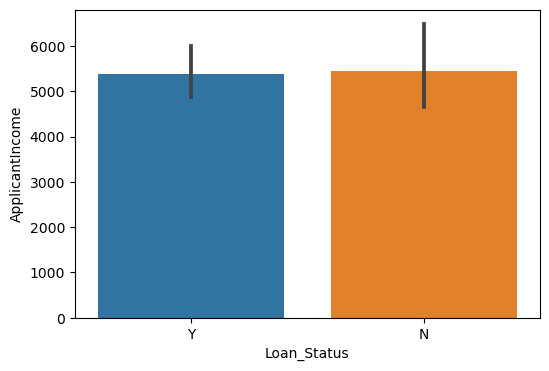

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Loan_Status', y='ApplicantIncome')
plt.show()

Here ApplicantIncome have equal ration of loan aapproaval

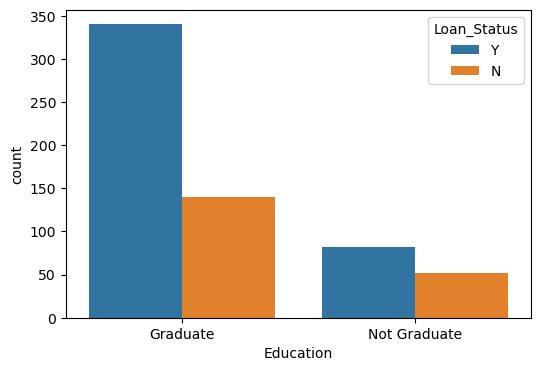

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', hue= 'Loan_Status')
plt.show()

Loan approval for Graduate is greater than non Graduate

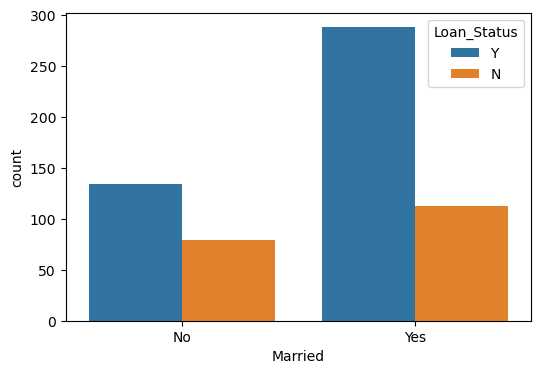

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.show()

Here married person are more approved loan

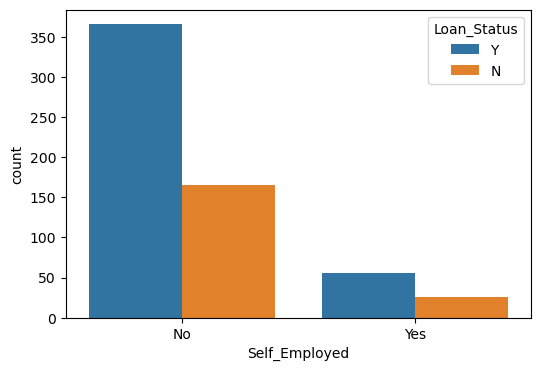

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.show()

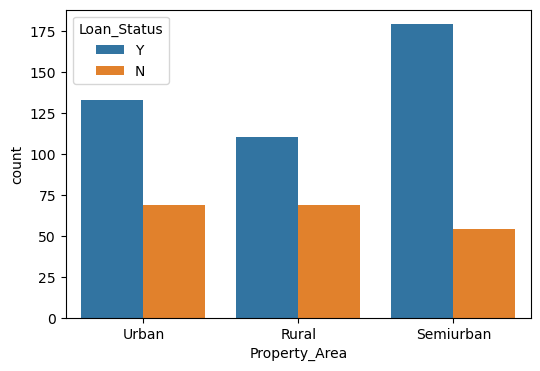

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.show()

Here high rate of approval loan for those who are Semiurban. and also higher chance of approval of Loan of urbans in Comparison to rural Property_Area

# Multivariate Analysis

# Encoding Categorical value to Numeric

In [38]:
from sklearn.preprocessing import LabelEncoder

In [43]:
columns_to_encode= ['Gender', 'Married', 'Education','Self_Employed', 'Property_Area']
label_encoder = LabelEncoder()


In [44]:
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [45]:
df['Dependents'] = df.Dependents.map({'0':0, '1':1, '2':2, '3+':3})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         599 non-null    float64
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Property_Area      614 non-null    int32  
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(3), int64(3), object(1)
memory usage: 45.7+ KB


# Statistical Analysis

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,599.0,0.762938,1.015216,0.0,0.00,0.0,2.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Property_Area,614.0,1.037459,0.787482,0.0,0.00,1.0,2.00,2.0


Here we can see that mean data and 50th percentile value have differences. It means that there is possiblity of Outliers

<Axes: >

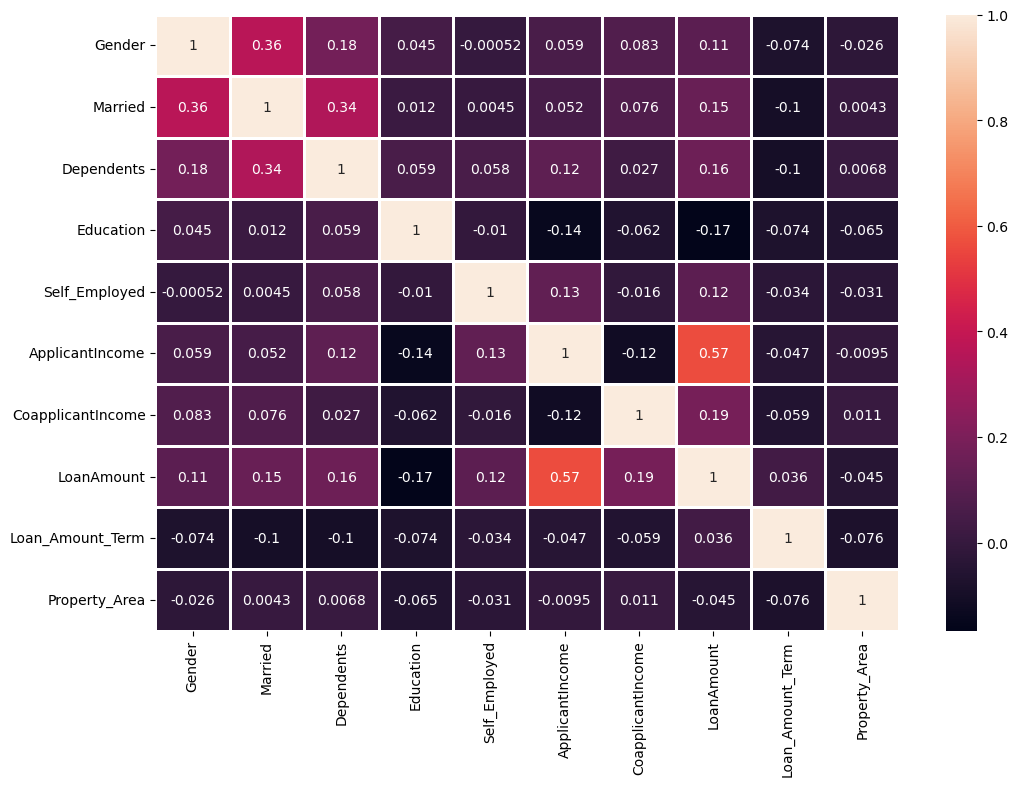

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot= True, linewidths=1, linecolor='white')

We can see that correlation between Loan_Amount is highly correlated to AapplicantIncome. MAried, Gender and Dependent are also correlated

# Outlier Detection

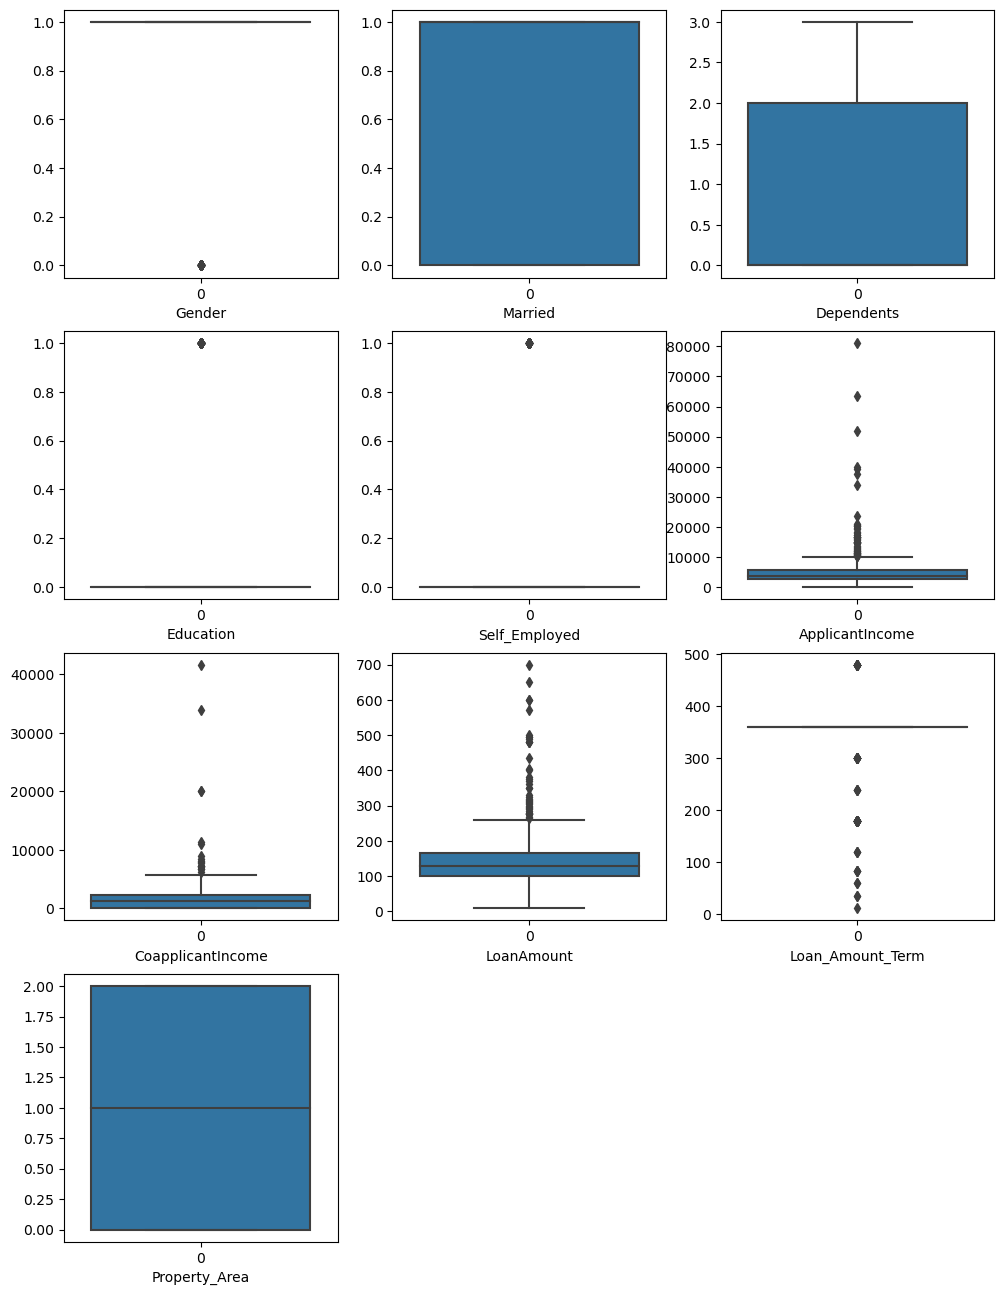

In [50]:
plt.figure(figsize=(12,16))
index=1
for column in df:
    if index <=10:
        ax= plt.subplot(4,3,index)
        sns.boxplot(df[column])
        plt.xlabel(column)
    index+=1
plt.show()

Here we can see boxplot indicates that we have outliers, these are present mostly in (ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount__Term) columns.

# Removing Outliers

In [51]:
from scipy.stats import zscore

In [52]:
columns_to_remove =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
z_scores= df[columns_to_remove].apply(zscore)

threshold= 3
df1 = df[(z_scores.abs()<threshold).all(axis=1)]

# Checking Skewness

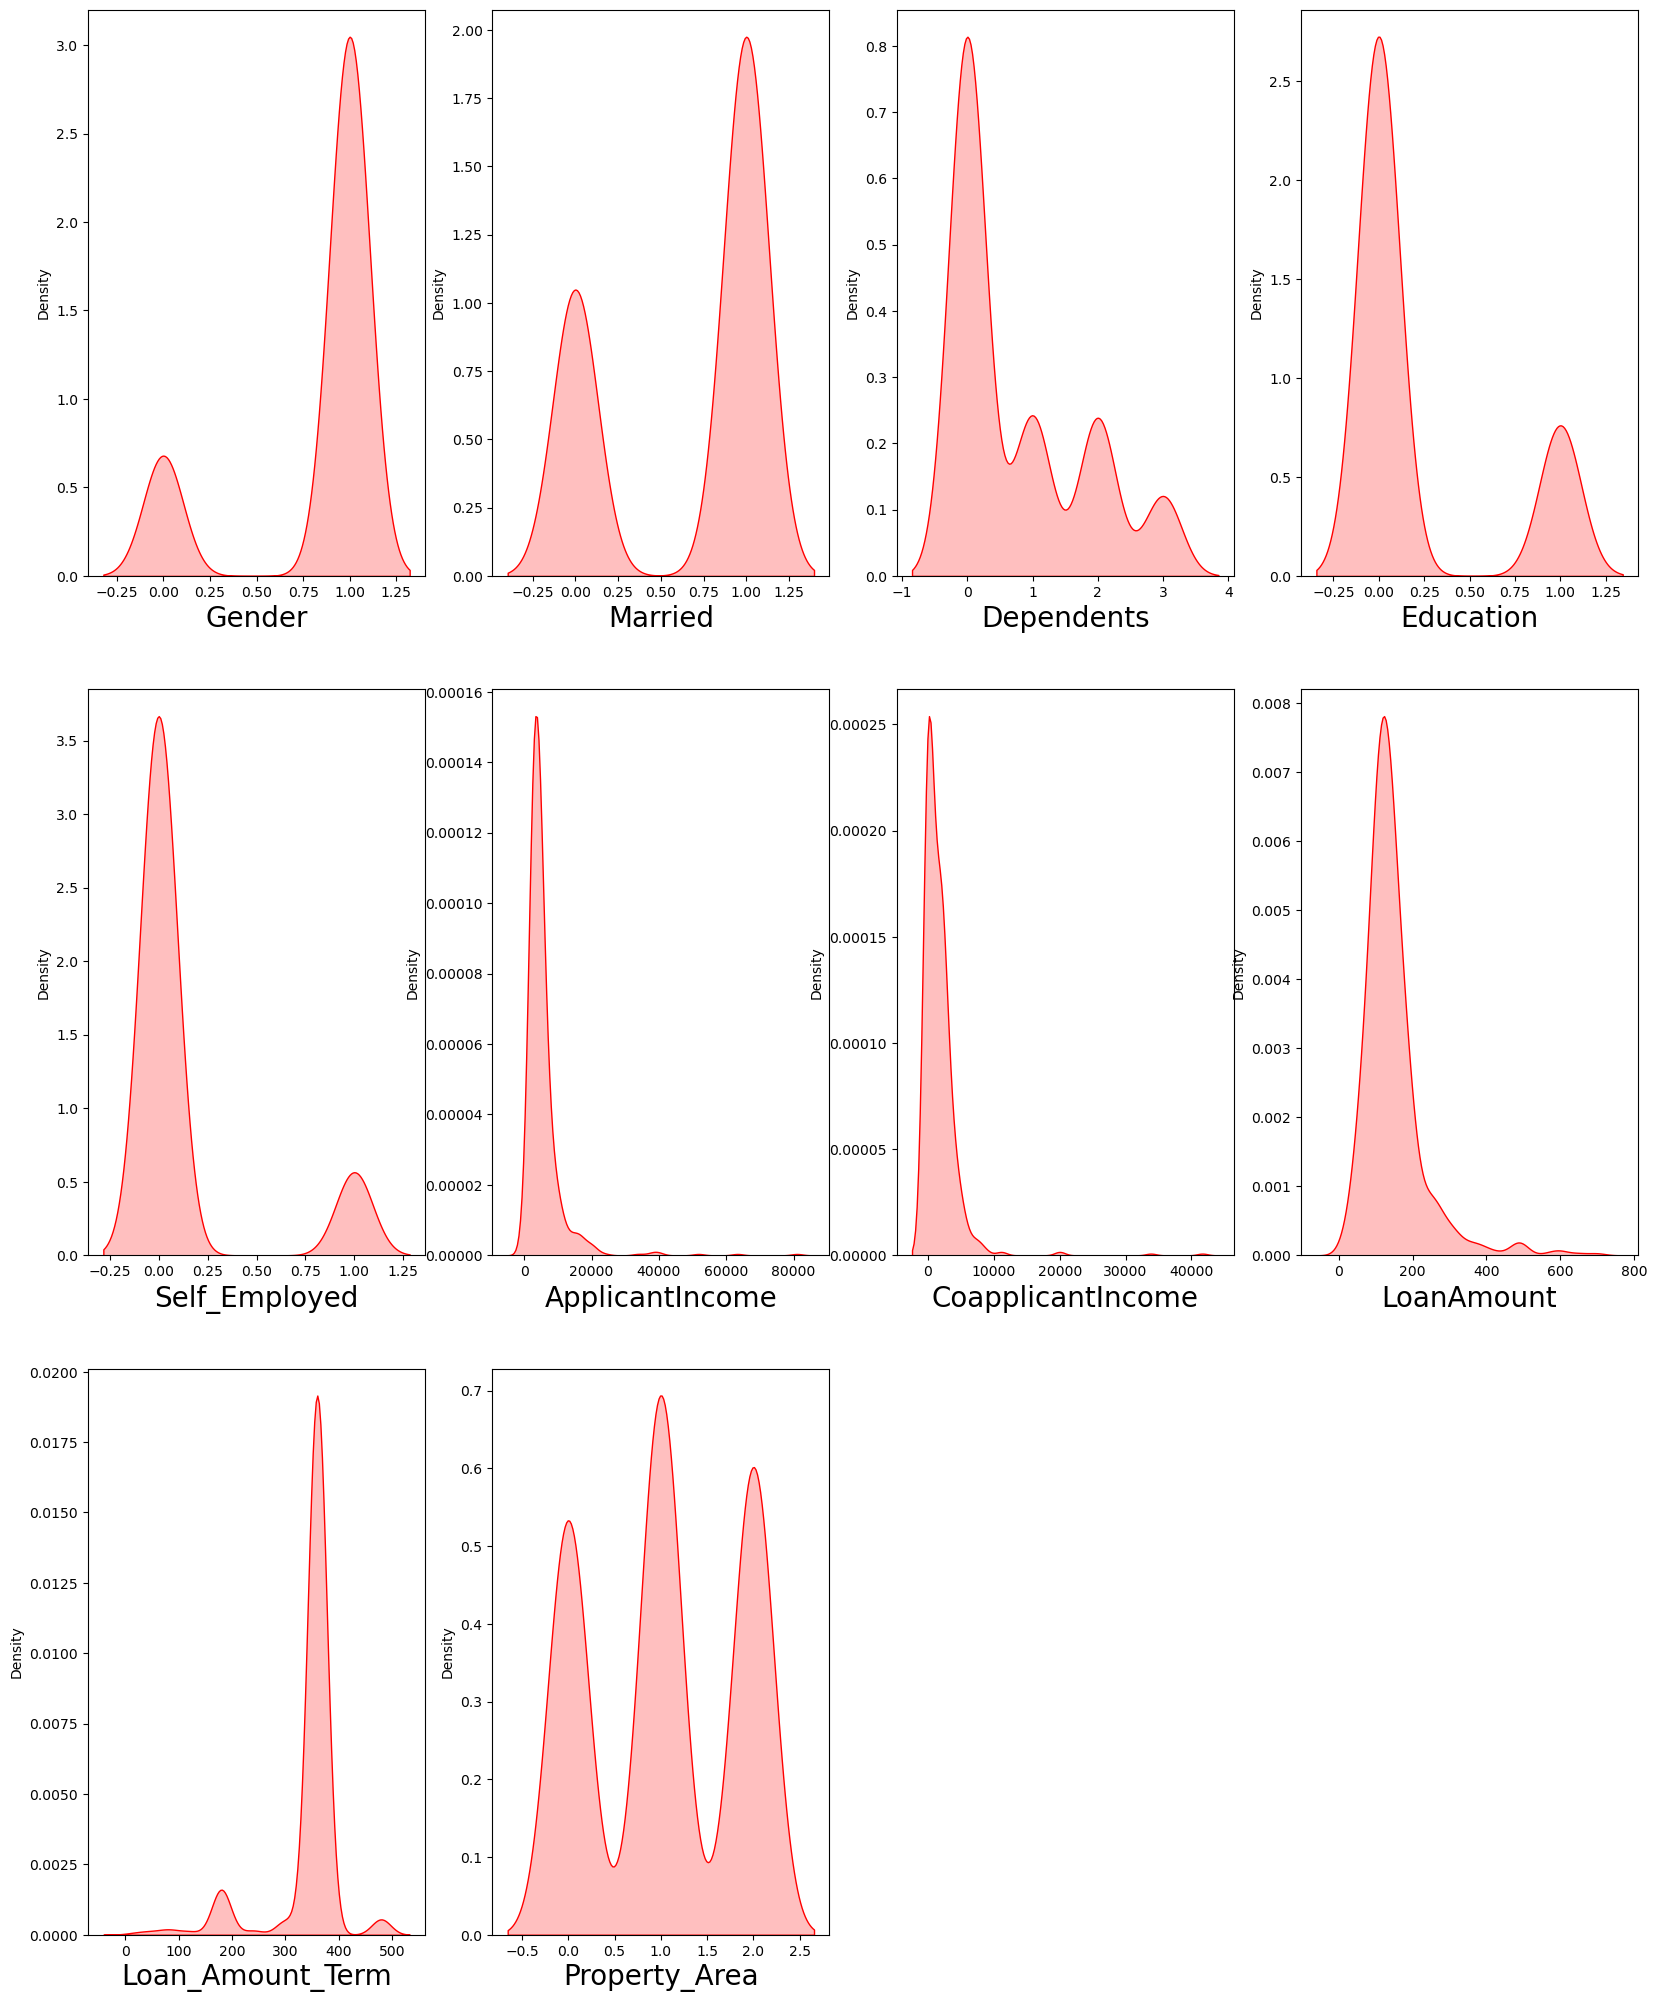

In [58]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [59]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.978647
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Property_Area       -0.066196
dtype: float64

Optimal range for skewness is -0.5 to 0.5
Some skewed columns are Right Skewed

# Removing Skewness Of Dataset

In [61]:
skew = ['Gender','Education','Dependents','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

# Removing Skewness using Yeo-Johnson.
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [62]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.408765
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.392571
Property_Area       -0.066196
dtype: float64

# Spliting Dataset

In [63]:
X = df.drop(columns =["Loan_Status"])
y = df["Loan_Status"]

In [64]:
X['Dependents']=X['Dependents'].fillna(0)

In [65]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
dtype: int64

# Standard Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [67]:
scaler

StandardScaler()

In [68]:
X_scaled= scaler.fit_transform(X)

# Varience- Inflation-Factor

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [75]:
vif_data = pd.DataFrame()
vif_data["Features List"]= X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values,i)
                       for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Gender,1.166025
1,Married,2.117235
2,Dependents,1.119380
3,Education,1.055826
4,Self_Employed,1.043133
5,ApplicantIncome,1.846299
6,CoapplicantIncome,1.511874
7,LoanAmount,1.590624
8,Loan_Amount_Term,1.037948
9,Property_Area,1.914018


# Machine Learning Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score

In [80]:
# Splitting the data fro training &testing
for i in range(1,250):
    X_train, X_test, y_train , y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
X_train.shape

(491, 10)

# Logistic Regression 

In [81]:
from sklearn.linear_model import  LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)
    

Best accuracy is 77.23577235772358 on Random_state 146


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=137)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7642276422764228


Confusion matrix of Logistics Regression : 
 [[ 1 28]
 [ 1 93]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           N       0.50      0.03      0.06        29
           Y       0.77      0.99      0.87        94

    accuracy                           0.76       123
   macro avg       0.63      0.51      0.46       123
weighted avg       0.71      0.76      0.68       123



# DecisionTreeClassifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

In [85]:
maxAccu1=0
maxRS=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred1=dtc.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy Score is: ', (maxAccu1)*100 ,'\nAt Random State: ', maxRS1)

Best accuracy Score is:  69.10569105691057 
At Random State:  67


# Classification Algorithm

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [88]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, y_pred))
    print('\n')
    
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.6747967479674797


Confusion matrix : 
 [[ 1 39]
 [ 1 82]]


Classification Report : 
               precision    recall  f1-score   support

           N       0.50      0.03      0.05        40
           Y       0.68      0.99      0.80        83

    accuracy                           0.67       123
   macro avg       0.59      0.51      0.43       123
weighted avg       0.62      0.67      0.56       123



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.6504065040650406


Confusion matrix : 
 [[ 5 35]
 [ 8 75]]


Classification Report : 
               precision    recall  f1-score   support

           N       0.38      0.12      0.19        40
           Y       0.68      0.90      0.78        83

    accuracy                           0.65       123
   macro avg       0.53      0.51      0.48       123
weighted avg       0.59      0.65      0.59       123



Classif

# Hyper Parameter Tuning

In [90]:
from sklrn.model_selection import GridSearchCV


In [91]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [92]:
grid_search = GridSearchCV(LogisticRegression(),param, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.313 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.306 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.316 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.00

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy', verbose=5)

In [93]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


# Final Model

In [94]:
model = LogisticRegression(C = 0.001, class_weight = None, max_iter = 100, penalty = 'l1', solver = 'saga')

In [95]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test,pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6747967479674797


Confusion matrix of Logistics Regression : 
 [[ 0 40]
 [ 0 83]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           N       0.00      0.00      0.00        40
           Y       0.67      1.00      0.81        83

    accuracy                           0.67       123
   macro avg       0.34      0.50      0.40       123
weighted avg       0.46      0.67      0.54       123



In [96]:
prediction=pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction

,predicted values,actual values
347,Y,Y
77,Y,N
364,Y,Y
305,Y,N
581,Y,N
...,...,...
517,Y,N
181,Y,N
75,Y,N
603,Y,Y


# Saving Model

In [97]:
import joblib
joblib.dump(model,'Loan_Application_Status.pkl')

['Loan_Application_Status.pkl']

# Conclusion:
The Logistic Regression model gave the best performance in predicting loan approval status.
Features like Married, Education, Applicant Income, and Property Area were significant in determining loan approval.
The final model can be used to make informed decisions regarding loan approvals.